# EDA and cluster analysis of Cardiovascular disease

The dataset consists of 70,000 records of patients data in 12 features (age, gender, systolic blood pressure, diastolic blood pressure,glucose,smoke,alcohol intake, physical activity) The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy

Features:

* Age-(days)
* Height-(cm) 
* Weight-(kg) 
* Gender- 1 Female, 2Male  
* Systolic blood pressure-ap_hi
* Diastolic blood pressure- ap_lo 
* Cholesterol- 1: normal, 2: above normal, 3: well above normal 
* Glucose- 1: normal, 2: above normal, 3: well above normal 
* Smoking-smoke (binary)
* Alcohol intake (binary)
* Physical activity (binary)
* Presence or absence of cardiovascular disease- Target Variable- binary 

**Understanding the data via initial analysis**

In [1]:
#inserting all the modules and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set()


In [2]:
data= pd.read_csv('cardio_train.csv',sep=';') #loading the dataset using pandas

In [3]:
data.head(10) #displaying first 10 rows of the dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 decimal number (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field. 

Converting the height into meters and age into years for more convenience.

In [5]:
data['height']= data['height']/100  #converting cm to m

In [6]:
data['age']=(data['age'] / 365).round().astype('int')  #converting age to years

In [7]:
data.height.head() #transformed height

0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
Name: height, dtype: float64

In [8]:
data.shape

(70000, 13)

Using describe() to display sample statistics such as min, max, mean,std for each attribute

In [9]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.min() 

id               0.00
age             30.00
gender           1.00
height           0.55
weight          10.00
ap_hi         -150.00
ap_lo          -70.00
cholesterol      1.00
gluc             1.00
smoke            0.00
alco             0.00
active           0.00
cardio           0.00
dtype: float64

As can be seen above there are some inconsistencies in the data as the least weight age is 10Kg for an age of 30 year. 
Removing the outliers.

In [11]:
df= data
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [12]:
data.min()

id               0.0
age             30.0
gender           1.0
height           1.5
weight          52.0
ap_hi         -150.0
ap_lo          -70.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           0.0
cardio           0.0
dtype: float64

Calculating the bmi using height and the weight data from the dataset

In [13]:
data['bmi']=df['weight']/df['height']**2
data['bmi']=data['bmi'].round().astype('int')

In [14]:
data['bmi'].head()

0    22
1    35
2    24
3    29
4    23
Name: bmi, dtype: int32

In [15]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

Checking for any duplicate values in the dataset

In [16]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


**Data Visualization**

C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


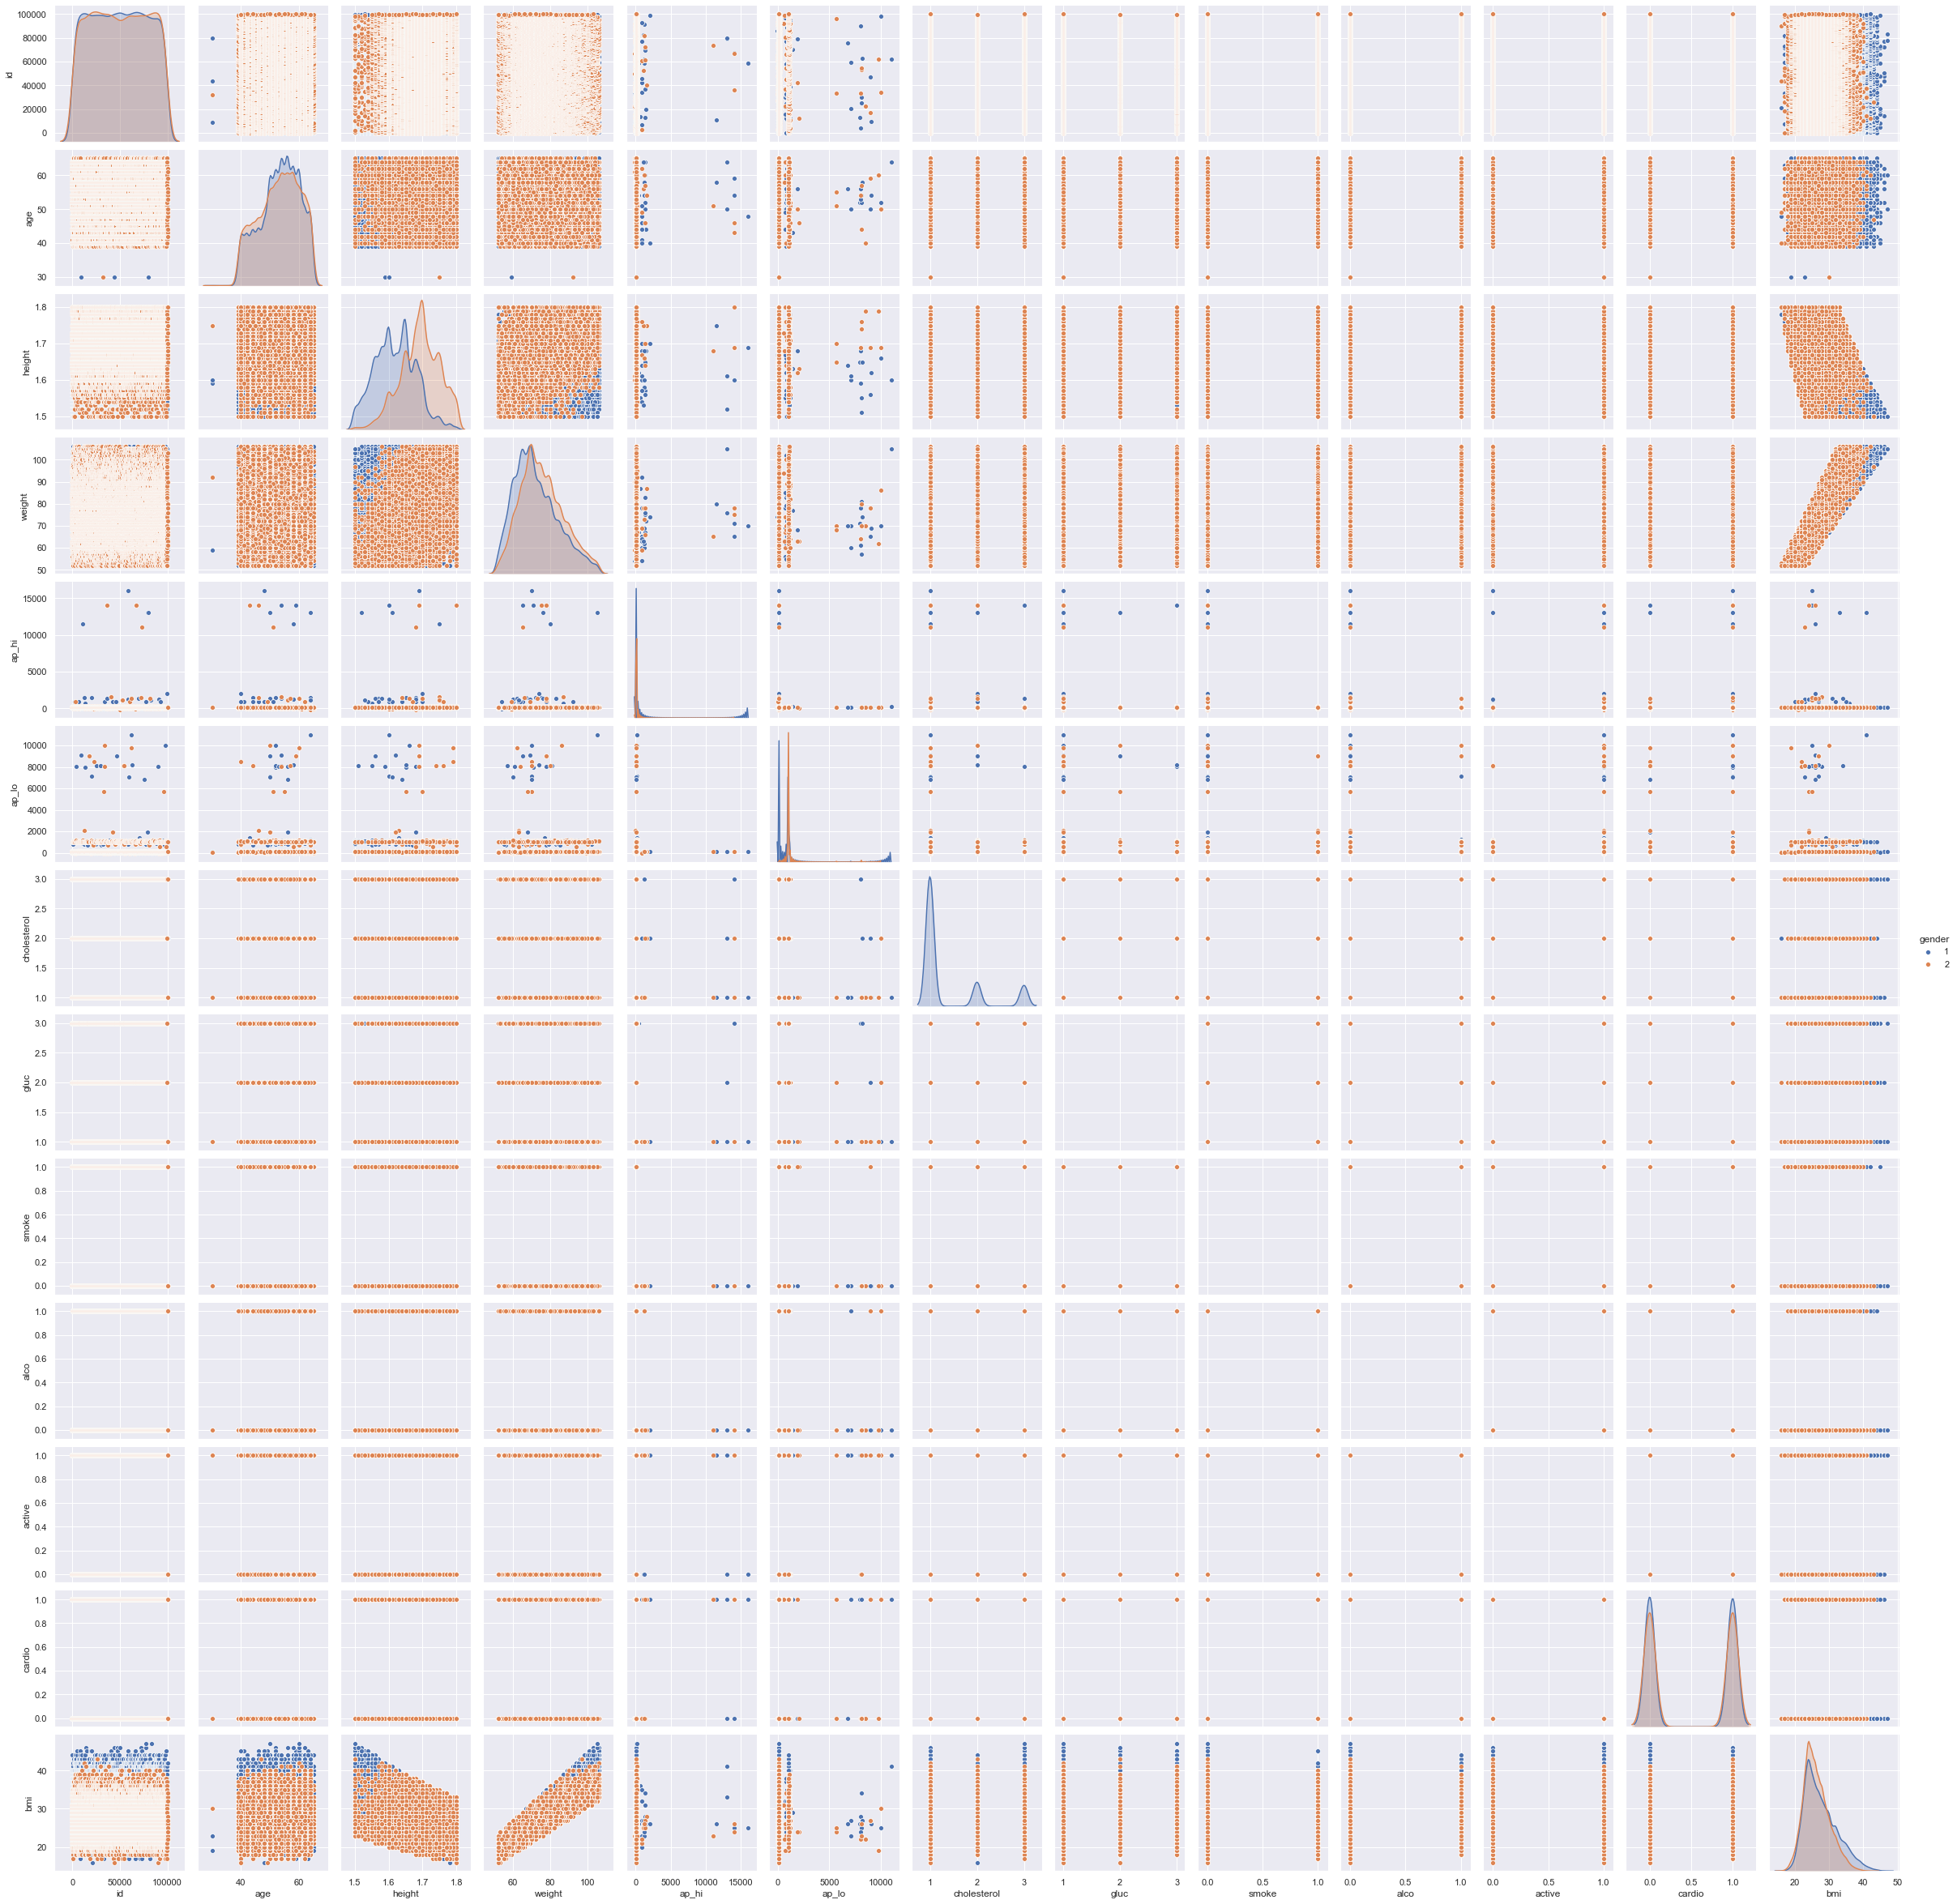

In [17]:
sns.pairplot(data,hue='gender')


**Multivariate analysis**

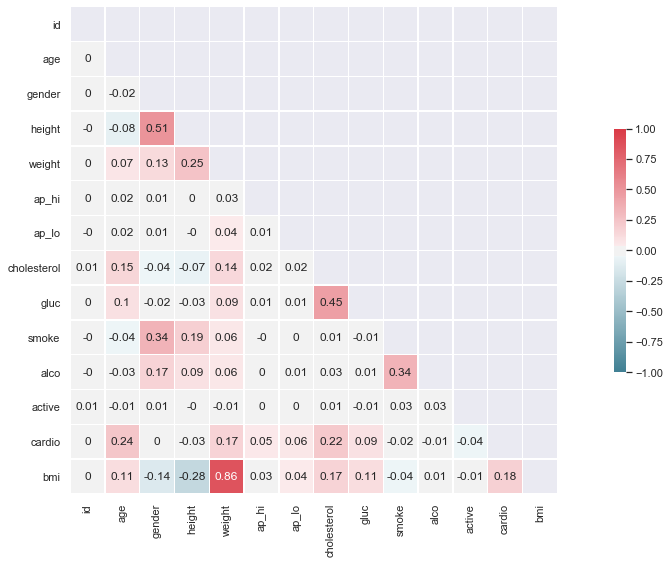

In [18]:
# Generate and visualize the correlation matrix
corr = data.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(16, 8))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Counting the bmi in the dataset with relevant physical activity

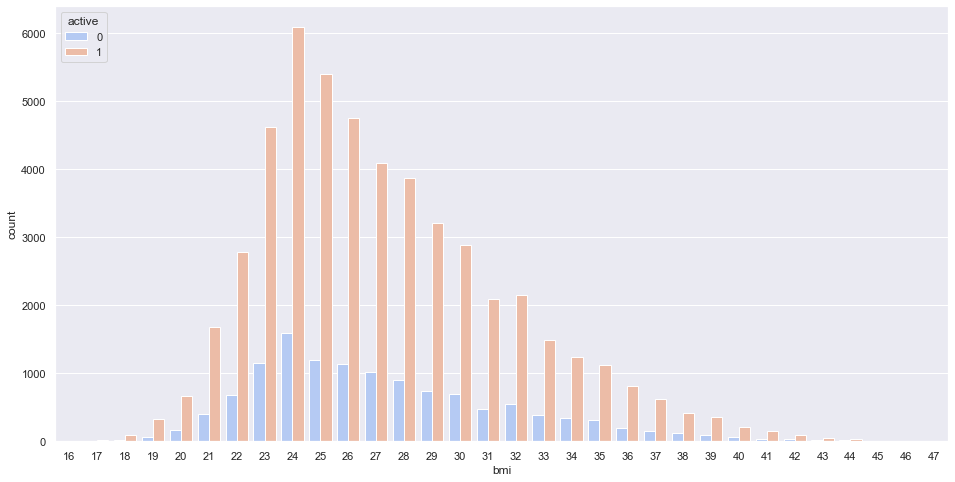

In [19]:

plt.figure(figsize=(16,8))
sns.countplot(x='bmi',hue='active',data=data,palette='coolwarm')



It can be inferred that people indulged in physical activity have normal BMI when compared to people with no activity.

Checking the relation between the alcohol consumption and the possiblity of the disease

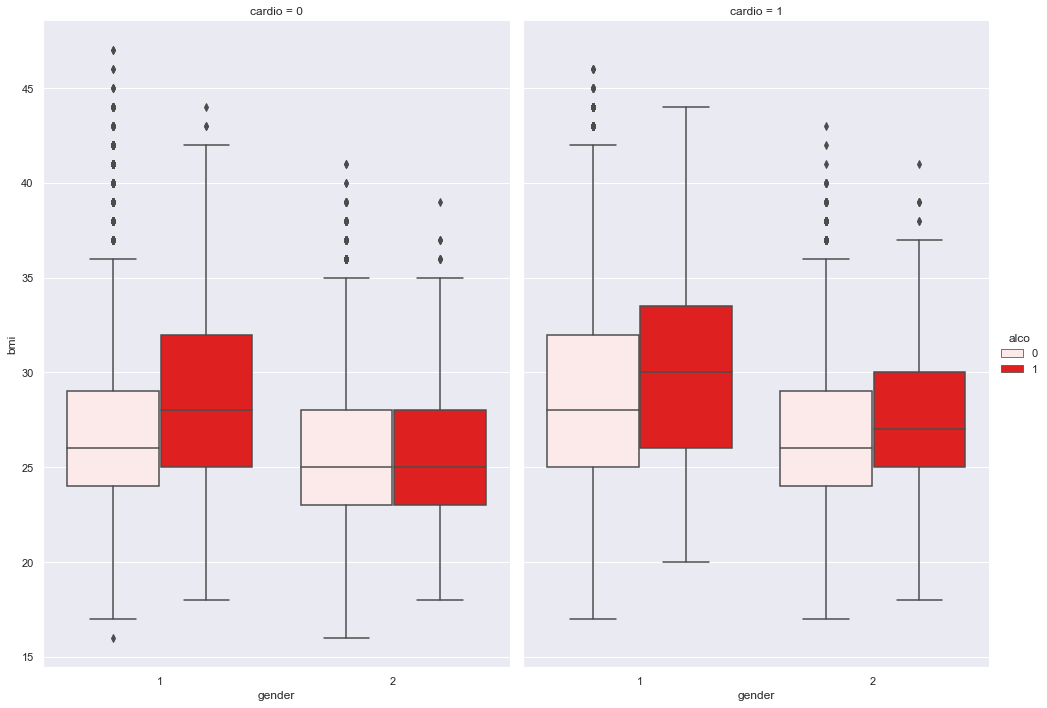

In [20]:
sns.catplot(x="gender", y="bmi", hue="alco", col="cardio", data=data, color = "red",kind="box", height=10, aspect=.7)

Drinking women have higher risks for CVD than drinking men based on thier BMI

Checking the hight and weight distribution in the data

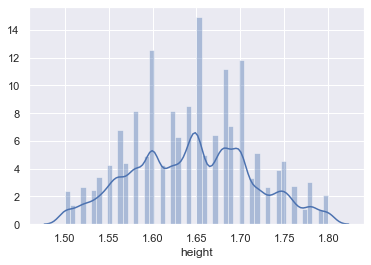

In [22]:
sns.distplot(data.height,kde=True)

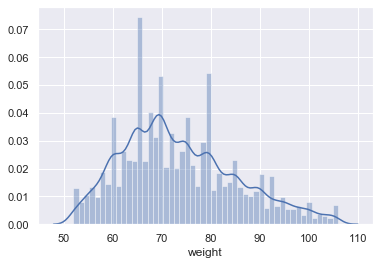

In [23]:
sns.distplot(data.weight,kde=True)

Relation between age and the disease

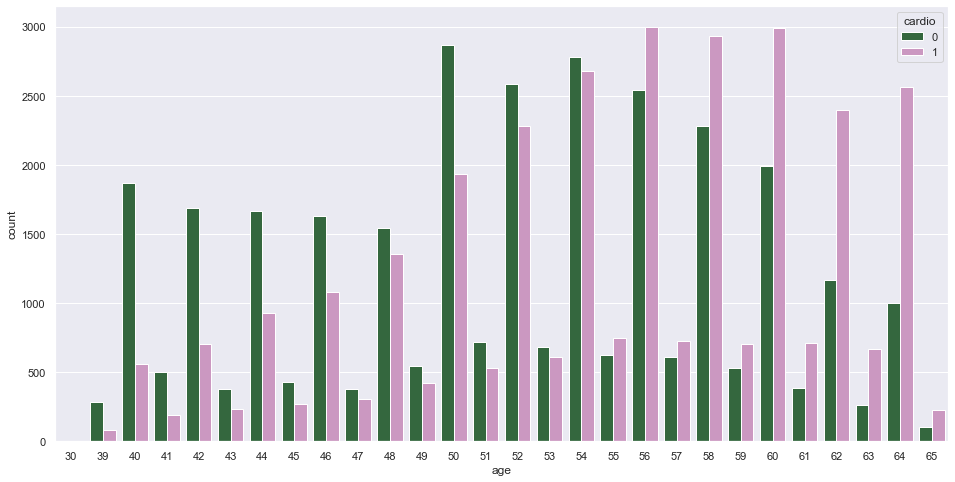

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x='age', hue='cardio', data = data, palette="cubehelix")


From the figure it could interpreted that the chances of having the disease is higher for the people above 55

**Bivariate analysis**

It is useful to split categorical variables by target class

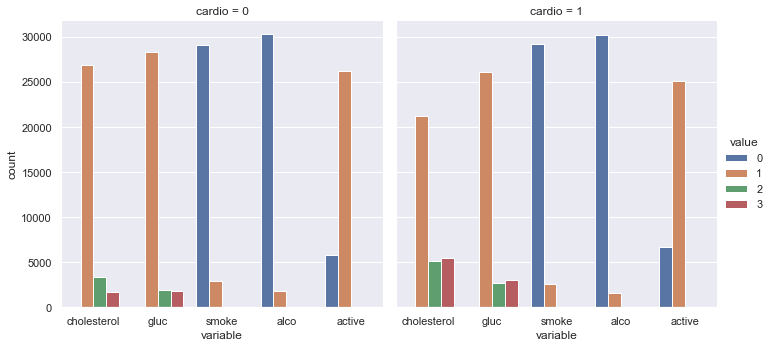

In [25]:
df = pd.melt(data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df, kind="count");

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level.

In [26]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Getting rid off outliers as the blood pressure cannot be negatvie

In [27]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


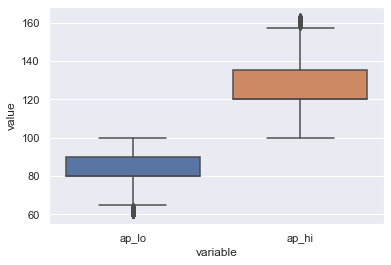

In [28]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

**Clustering of the data**

In [50]:
X = StandardScaler().fit_transform(data) #fitting and transforming the data to be clustered
X

array([[-1.73007294, -0.4948708 ,  1.37086134, ..., -0.97672647,
        -1.17024619,  0.84245693],
       [-1.73003827,  0.24622042, -0.72946838, ...,  1.02382809,
         1.77652653, -0.67062449],
       [-1.73000359, -0.19843432, -0.72946838, ...,  1.02382809,
        -0.71689654,  0.84245693],
       ...,
       [ 1.73706331, -0.05021607,  1.37086134, ..., -0.97672647,
        -0.03687207, -2.18370591],
       [ 1.73723668,  1.13552988, -0.72946838, ...,  1.02382809,
        -0.03687207, -0.67062449],
       [ 1.73727135,  0.39443866, -0.72946838, ..., -0.97672647,
        -0.49022172,  0.84245693]])

In [51]:
#initializing clustering
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [52]:
labels= model.predict(X) #identifying the clusters

In [53]:
labels

array([1, 2, 1, ..., 0, 2, 1])

Inertia of the model

In [54]:
model.inertia_  

664166.2487227615

**Visualizing the data clusters**

In [55]:
data['clusters']= labels


In [56]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,clusters
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,22,1
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,35,2
2,2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,24,1
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,29,2
4,4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23,1


Text(0.5, 0, 'CVD (binary)')

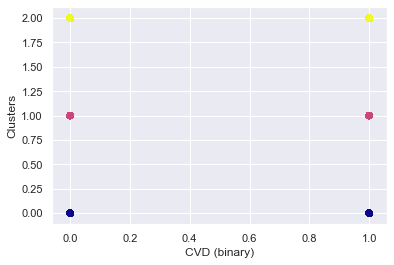

In [59]:
plt.scatter(data['cardio'],data['clusters'],c=data['clusters'],cmap='plasma')
plt.ylabel('Clusters')
plt.xlabel('CVD (binary)')


Text(0, 0.5, 'Clusters')

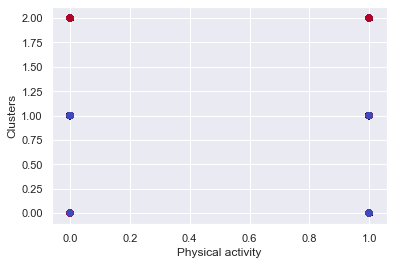

In [60]:
plt.scatter(data['active'],data['clusters'],c=data['cardio'],cmap='coolwarm')
plt.xlabel('Physical activity')
plt.ylabel('Clusters')

Text(0, 0.5, 'Clusters')

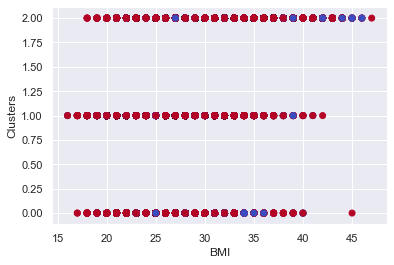

In [64]:
plt.scatter(data['bmi'],data['clusters'],c=data['active'],cmap='coolwarm')
plt.xlabel('BMI')
plt.ylabel('Clusters')

**Checking the strength of the cluster**

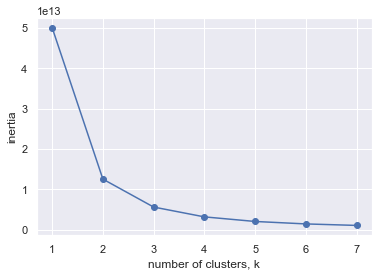

In [65]:
ks=range(1,8)
inertias=[]
for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

From the elbow curve, we can see that suitable number of clusters for the dataset is 3